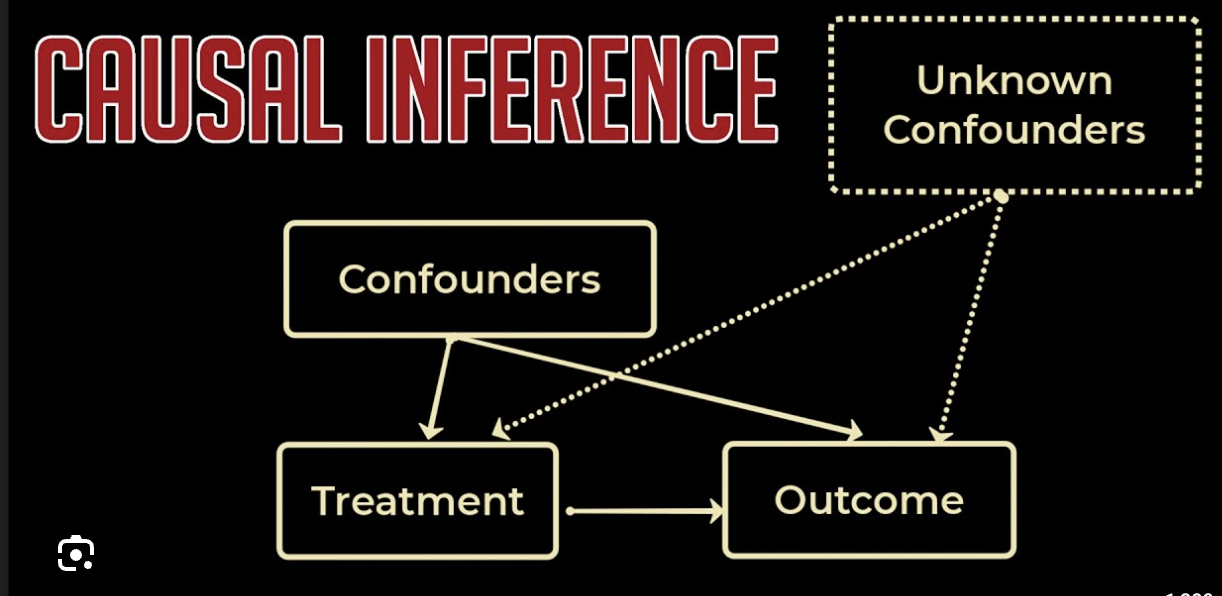

# Correlation does not equal causation
Spurious correlations 
Example 1. Number of shark attacks positively correlation with volume of ice cream sales , at sampled beaches over the year 
2. Country wide chocolate consumption positivey correlated with Noble prizes per capita

# Understanding Causality in Data Science

## What is Causality?

Causality refers to the relationship between cause and effect. It is the principle that one event (the cause) brings about another event (the effect). In data science, understanding causality is essential for making informed decisions and predictions based on observational data.

## Key Concepts:

### Treatments:

- Treatments are the variables or interventions that are manipulated or administered to subjects in a study.
- They represent the factors or conditions whose effects we are interested in understanding or estimating.

### Outcome:

- The outcome variable is the response or measure of interest that we aim to study or predict.
- It represents the effect of the treatment(s) on the subjects.

### Confounders:

- Confounders are variables that are associated with both the treatment and the outcome.
- They can distort the observed relationship between the treatment and the outcome if not properly accounted for.
- Controlling for confounders is crucial to estimate the causal effect accurately.

## Estimating Causality:

Causal inference aims to estimate the causal effect of a treatment on an outcome variable while accounting for confounding factors. Several methods can be used for causal inference:

1. **Randomized Controlled Trials (RCTs)**:
   - Gold standard method for estimating causality.
   - Subjects are randomly assigned to treatment and control groups, minimizing confounding effects.

2. **Observational Studies**:
   - When RCTs are not feasible, observational studies can be used.
   - Methods such as Propensity Score Matching, Instrumental Variables, and Regression Adjustment are employed to control for confounders.

3. **Counterfactual Framework**:
   - Causal inference often involves comparing what happened (the observed outcome) with what would have happened (the counterfactual outcome) if a different treatment had been received.
   - This framework allows us to estimate the causal effect by comparing outcomes under different treatment conditions.

## Conclusion:

Understanding causality and estimating causal effects are fundamental tasks in data science and decision-making. By carefully designing studies and employing appropriate causal inference methods, we can gain valuable insights into the effects of treatments on outcomes while accounting for confounding factors.


# Problem Statement:

The human resources department of a large corporation is concerned about the high attrition rates among its employees. They want to investigate the factors contributing to attrition and identify potential interventions to reduce turnover.

## Question 

What is the effect of employee working overtime on attrition rate of the company?

## Dataset Description:

The dataset contains various attributes of employees, including demographic information, job-related factors, and indicators of attrition.

Columns include:

'EmpID': Employee ID 'Age': Age of the employee 'AgeGroup': Age group of the employee 'Attrition': Indicator of whether the employee has left the company (Yes/No) 'BusinessTravel': Frequency of business travel 'DailyRate': Daily rate of pay 'Department': Department in which the employee works 'DistanceFromHome': Distance from home to workplace 'Education': Level of education 'EducationField': Field of education 'EnvironmentSatisfaction': Satisfaction with the work environment 'Gender': Gender of the employee 'HourlyRate': Hourly rate of pay 'JobInvolvement': Level of involvement in job tasks 'JobLevel': Job level within the company 'JobRole': Role or position in the company 'JobSatisfaction': Satisfaction with the job 'MaritalStatus': Marital status of the employee 'MonthlyIncome': Monthly income of the employee 'SalarySlab': Salary slab or category 'MonthlyRate': Monthly rate of pay 'NumCompaniesWorked': Number of companies the employee has worked for 'Over18': Indicator of whether the employee is over 18 years old 'OverTime': Indicator of whether the employee works overtime 'PercentSalaryHike': Percentage increase in salary 'PerformanceRating': Performance rating 'RelationshipSatisfaction': Satisfaction with relationships at work 'StandardHours': Standard hours of work per week 'StockOptionLevel': Level of stock options granted to the employee 'TotalWorkingYears': Total years of work experience 'TrainingTimesLastYear': Number of training sessions attended last year 'WorkLifeBalance': Balance between work and personal life 'YearsAtCompany': Number of years spent at the company 'YearsInCurrentRole': Number of years in the current role 'YearsSinceLastPromotion': Number of years since the last promotion 'YearsWithCurrManager': Number of years with the current manager Approach:

We aim to perform causal inference to understand the causal relationships between various factors and employee attrition. In this context:

Treatment: Potential interventions or factors that could influence attrition rates, such as overtime work, training programs, work-life balance initiatives, or performance incentives. Control Group: Employees who are not exposed to the treatment or intervention, allowing us to compare their attrition rates with those who received the treatment. 

Confounders: Variables that are associated with both the treatment and the outcome (attrition) but are not on the causal pathway between them. Confounders may include factors such as age, job satisfaction, education level, years at the company, and performance rating. Problem Statement (Refined):

The human resources department of a large corporation seeks to understand the causal factors contributing to employee attrition. By analyzing the dataset, we aim to identify potential interventions or policies that could effectively reduce attrition rates. Through causal inference analysis, we will investigate the impact of various workplace factors, such as training opportunities, work-life balance, and job satisfaction, on employee attrition. Additionally, we will account for potential confounders to ensure accurate estimation of causal effects and provide evidence-based recommendations to mitigate turnover and improve employee retention strategies.

In [65]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.validation import column_or_1d

In [3]:
df = pd.read_excel("HR_Analytics.xlsx")

In [4]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# df = df[["EmpID", 'Attrition',"Age", "Education","TrainingTimesLastYear","MonthlyIncome", 'WorkLifeBalance', 'YearsAtCompany','JobSatisfaction']]

In [6]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [7]:
# df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

In [8]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [9]:
average_salary = df['MonthlyIncome'].mean()

# Create a new column 'AboveAverageSalary' with binary values
df['AboveAverageSalary'] = (df['MonthlyIncome'] > average_salary).astype(int)

In [10]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AboveAverageSalary
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,80,0,0,2,3,0,0,0,0.0,0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,80,0,0,2,3,0,0,0,0.0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,80,0,0,3,3,0,0,0,0.0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,80,0,0,2,3,0,0,0,0.0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,80,0,0,0,3,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,80,0,33,5,1,29,8,11,10.0,1
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,80,0,22,5,4,18,13,13,11.0,1
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,80,0,10,1,3,2,2,2,2.0,0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,80,1,12,3,3,11,7,1,9.0,0


In [11]:
df.nunique()

EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptio

Observations:
As we have supposed, we can confirm that Employee Count, Over18 and StandardHours have only one value for all.
Employee number being id is unique key.
We can drop these columns.
Lets also categorize the continuous and categorical variables

In [12]:
df = df.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AboveAverageSalary
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,0,0,2,3,0,0,0,0.0,0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,0,0,2,3,0,0,0,0.0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,0,0,3,3,0,0,0,0.0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,0,0,2,3,0,0,0,0.0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,0,0,0,3,0,0,0,0.0,0


In [13]:
numeric_cols = ['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                      'YearsAtCompany','NumCompaniesWorked','HourlyRate',
                      'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

# Our output variable is Attrition: Which is a categorical Variable. 
categorical_cols = ['Attrition','OverTime','BusinessTravel', 'Department','Education', 
                       'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
                       'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement',
                       'JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

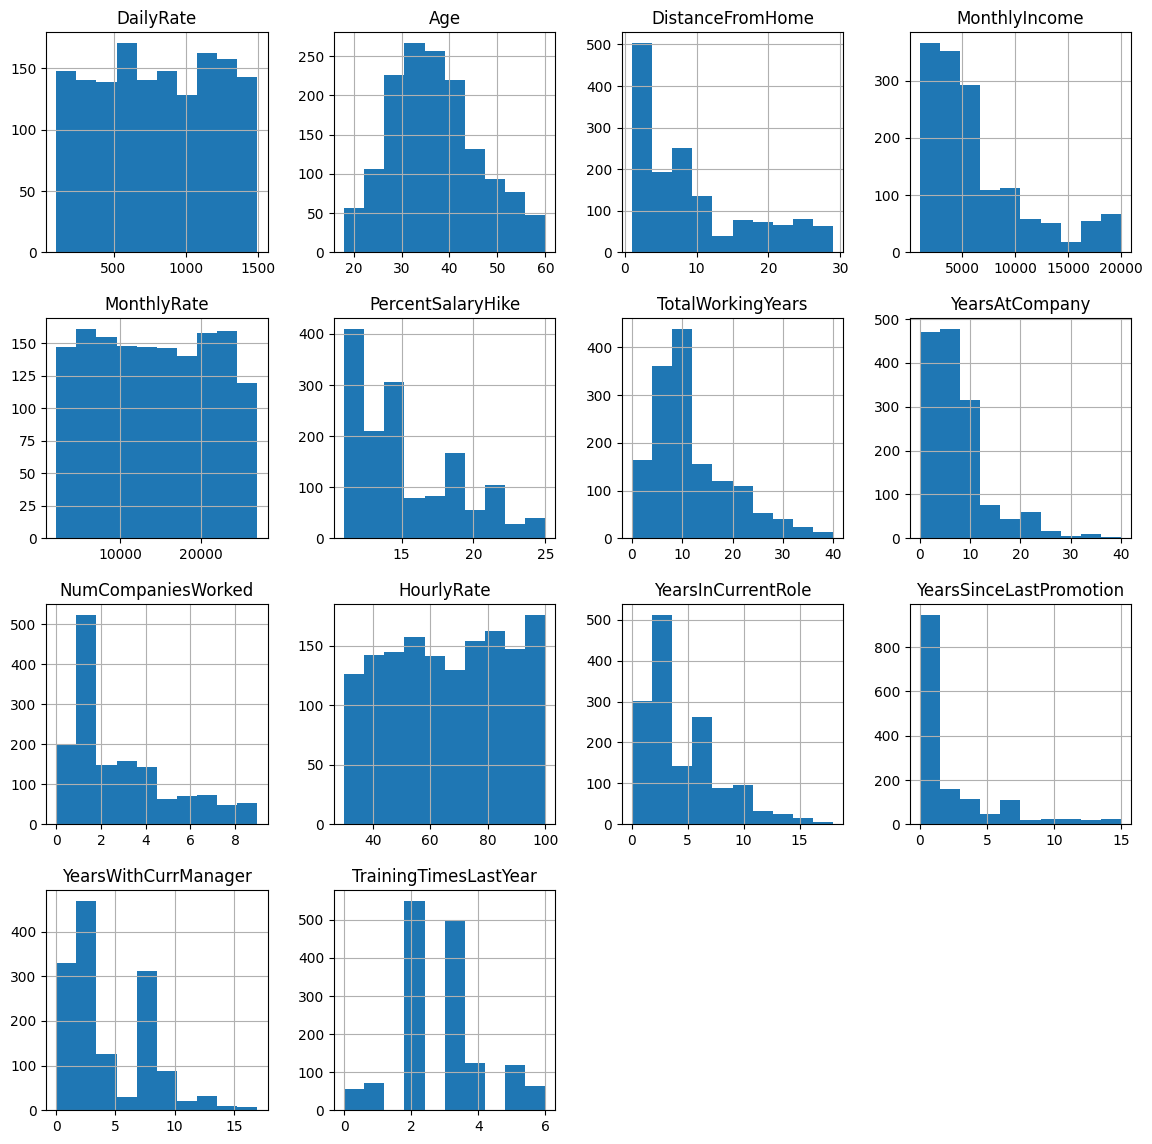

In [14]:
df[numeric_cols].hist(figsize=(14, 14))
plt.show()

### Observations:¶
 * The mean age is around 36 ranging between 18 and 60 with normalized distribution, very lightly skewed   towards right. Mejority of the workforce is around 25 to 45, which is normal in a company.
 * Daily Rates have constant distribution across the range of 100 to 1500.
 * Most people live near the office, the mean being 7. There are some people who live a little far off but their number is quite small.
 * Income for most of the staff is concentrated in the cluster of 1000 to 6000. which means that majority of employees are entry level or mid-level.
 * Monthly rate is evenly ditributed.
 * Salary hike for most of the staff is clustered in range of 11 to 15.
 * Most of the staff has experience in 0 to 12 years range, whereby, it decreases progressively.
 * Most staff members have worked 0-11 years, where 0 - 6 years is a majority. Many loyal employee are present in the company, if we discount the entry level employee and look at the average, its around 10 years at the company.
 * Most people have worked in at least one company. There are quite a few freshers as well.
Hourly rate is constantly distributed.
 * Most employee are in current role for about 2 to 3 years.
 * Most of the employees have been promoted in the last year.
Years in current role and years with current manager look very similar and will have high correlation, this is normal as staying in role for x amount of time will most likely result in working under same manager for x amount of time.
 * Most staff members recieved 2 to 3 hours training in last year.

## Univariate Analysis of categorical Variables identified

In [15]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True))
    print("*"*50)

Attrition
No     0.839189
Yes    0.160811
Name: proportion, dtype: float64
**************************************************
OverTime
No     0.717568
Yes    0.282432
Name: proportion, dtype: float64
**************************************************
BusinessTravel
Travel_Rarely        0.704054
Travel_Frequently    0.188514
Non-Travel           0.102027
TravelRarely         0.005405
Name: proportion, dtype: float64
**************************************************
Department
Research & Development    0.653378
Sales                     0.304054
Human Resources           0.042568
Name: proportion, dtype: float64
**************************************************
Education
3    0.390541
4    0.269595
2    0.191216
1    0.116216
5    0.032432
Name: proportion, dtype: float64
**************************************************
EducationField
Life Sciences       0.410135
Medical             0.317568
Marketing           0.108784
Technical Degree    0.089189
Other               0.056081
Human 

### Observations:
* 16% attrition is observed. (This is our output variable)
* Around 28% staff works overtime.
* Around 19% travel frequently on business trips, 10 % never travel and 71% travel when needed.
* Most of the staff 65% is in R&D followed by 30% in sales and around 4-5% in HR.
* Most of the staff has either a bachelors degree or a masters degree who are from either life sciences background or Medical bacground. Maybe These people constitute the R&D department and Sales department. *  * Around 20% have attended college. 3to 4 % of Doctorate holders who could be in R&D department and rest 10% have poor education backgroud, may be low wage workers.
* Around 60% of the staff rated job satisfaction levels as high and very high which correlates highly with Environment satisfaction being rated high an job involvement being rated high as well.
* Almost same percent of people have rated job satisfaction, environment satisfaction and job involvement as low.
* Work life balance is in general good.
* We can see only two types of performance ratings given by the company excellent 85% and outstanding 15%. * This might be to keep the morale of the employees high.
* A healthy mix of job roles can be seen which is good.
* The company has 60-40 ratio of Men and Women.
* 45% are married, these might be the candidates who would not want to switch jobs as often, around 35% are single and potential candidates who can switch jobs as they do not carry responsibility of family while moving to another location.
* around 60% are satisfied in their personal life and will look for a stable life, less potential of attrition here.
* The other 30 - 40% (might be single or divorced or having family issues) are potential candidates for attrition.

 ### Bivariate and Multivariate Analysis¶
How does Attrition relate to other categorical values.

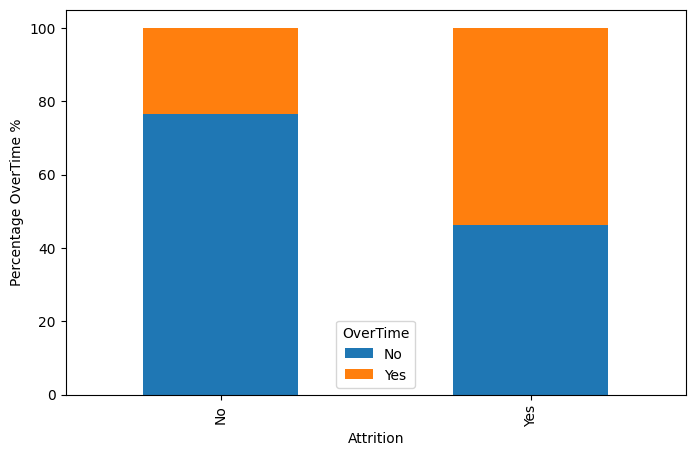

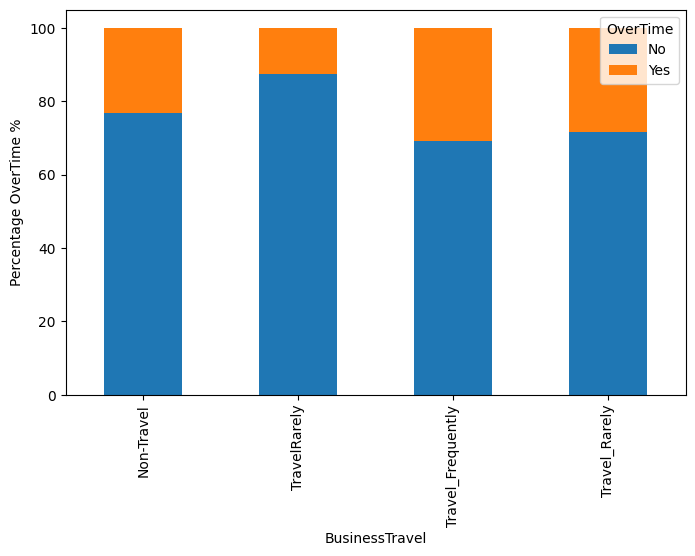

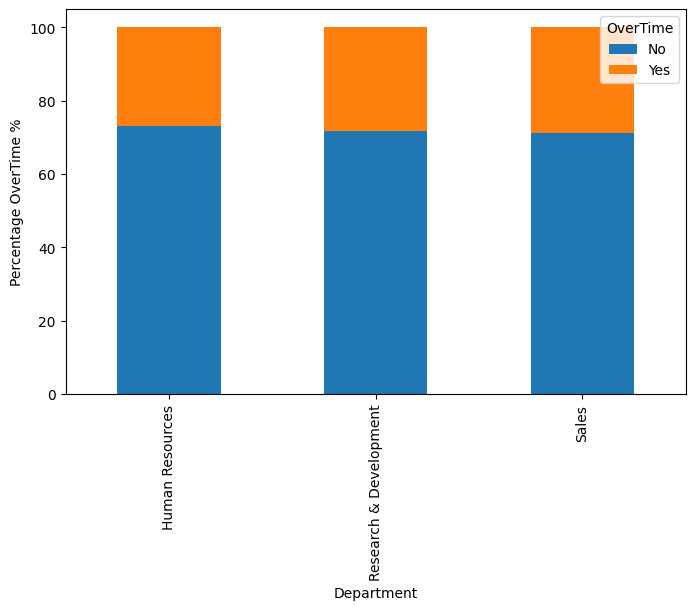

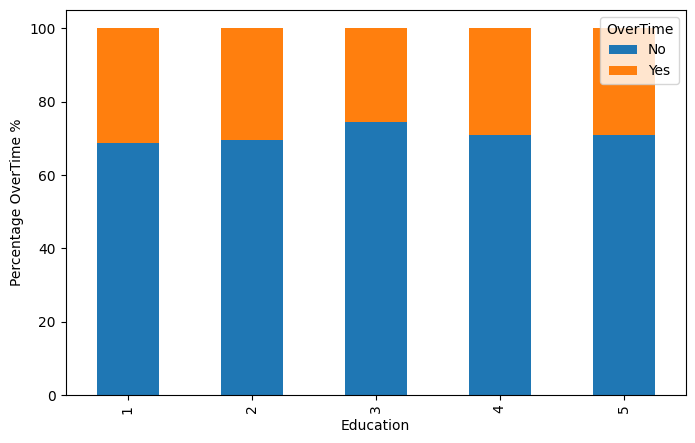

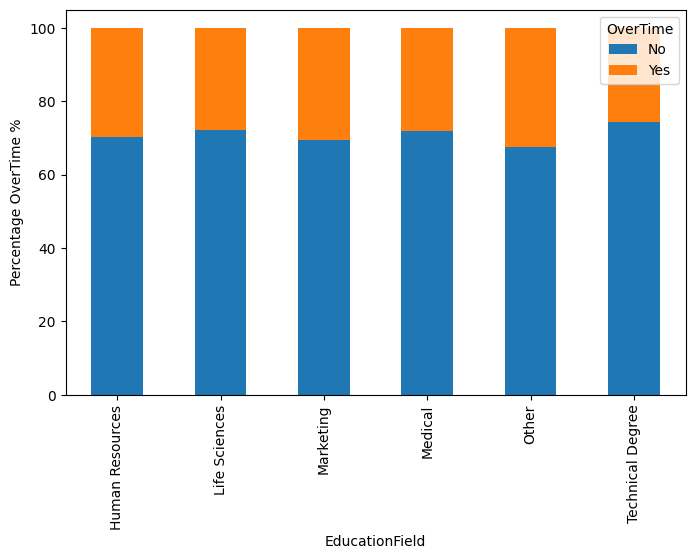

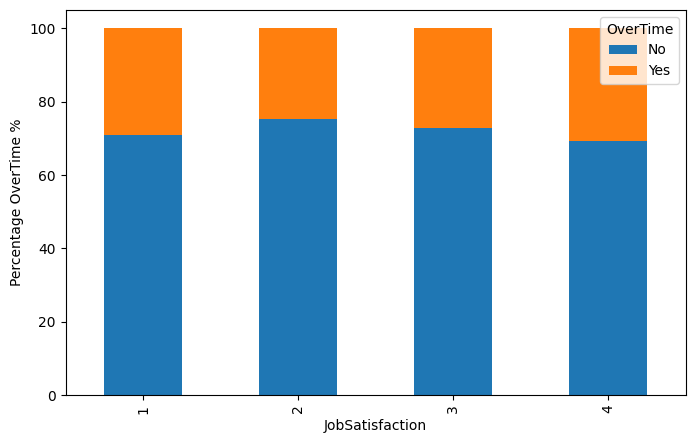

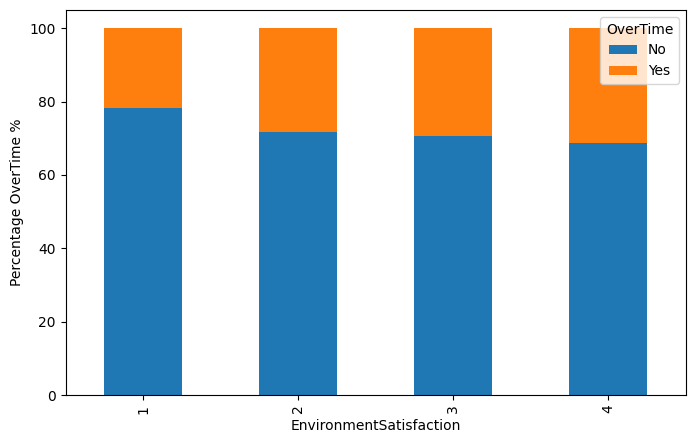

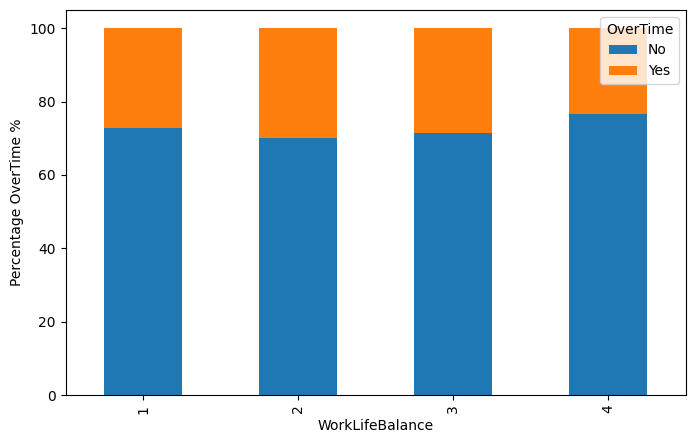

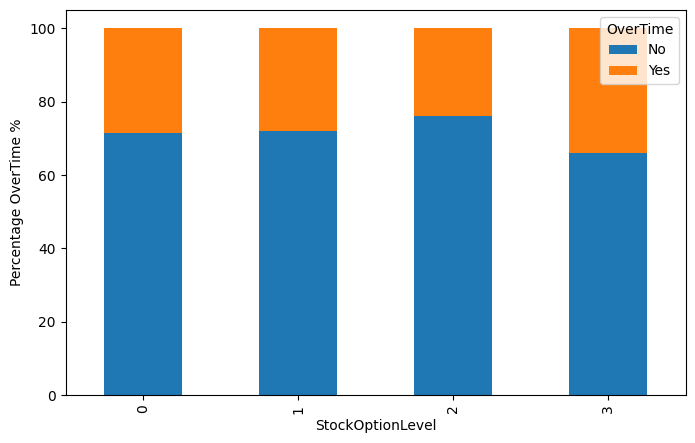

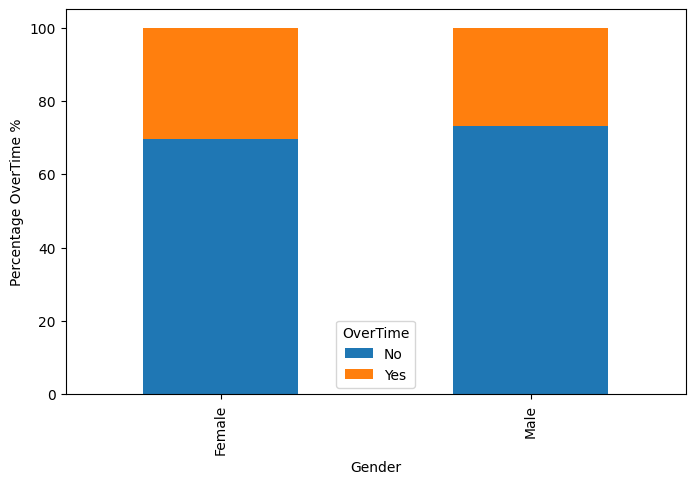

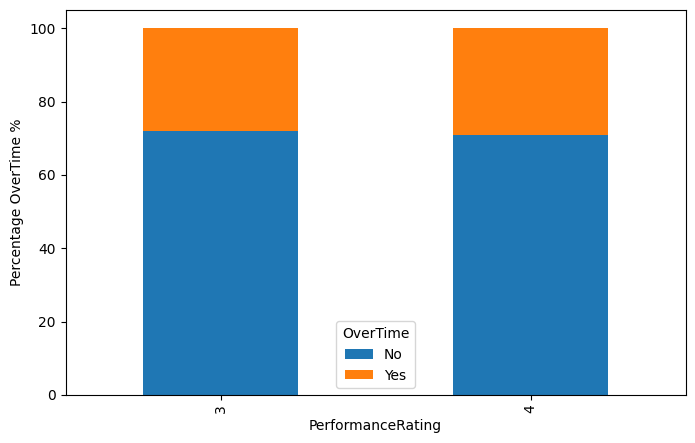

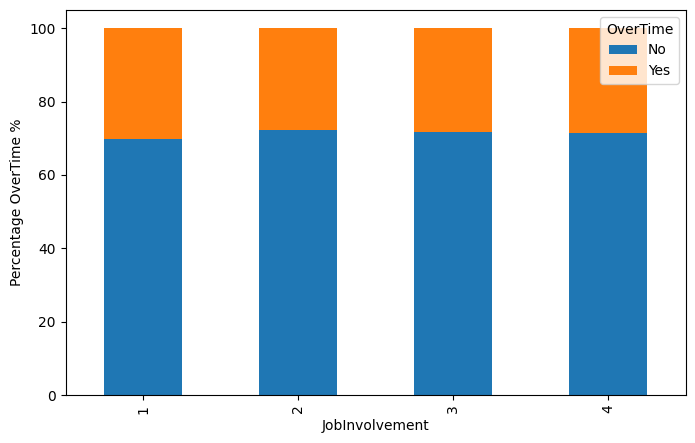

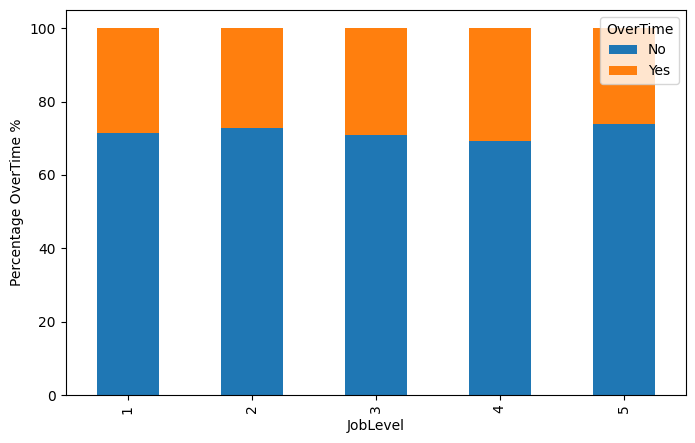

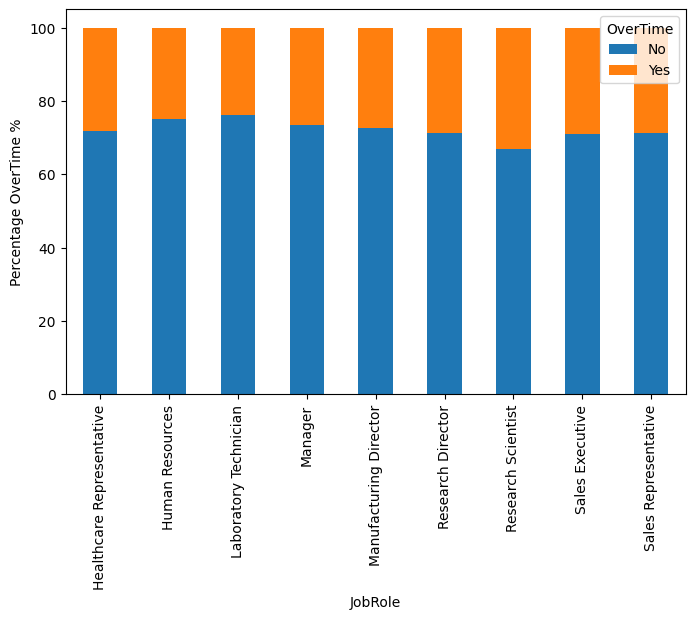

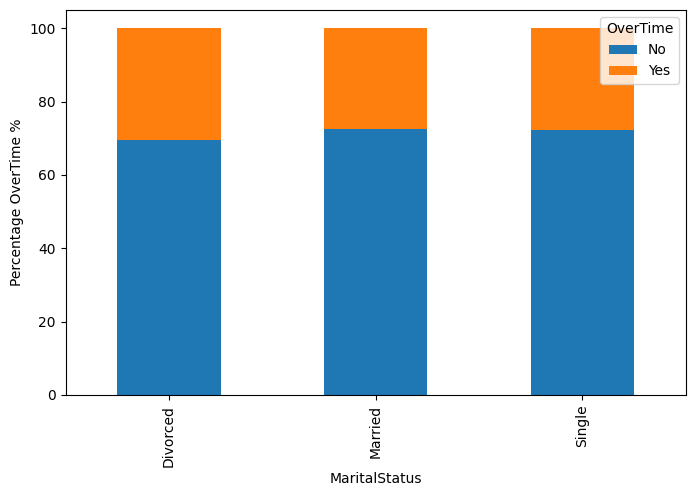

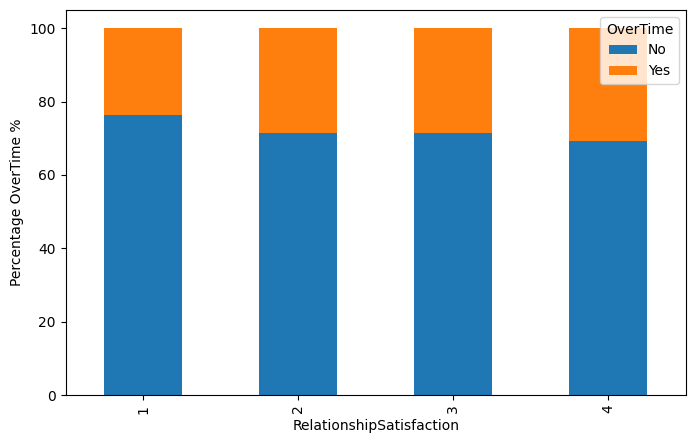

In [16]:
for col in categorical_cols:
    if col != "OverTime":
        # Creating a cross tab with normalized values (0 to 1) and getting the percentages, then plotting a barplot
        (pd.crosstab(df[col], df["OverTime"], normalize="index")*100).plot(kind="bar", figsize=(8,5), stacked=True)
        plt.ylabel("Percentage OverTime %")

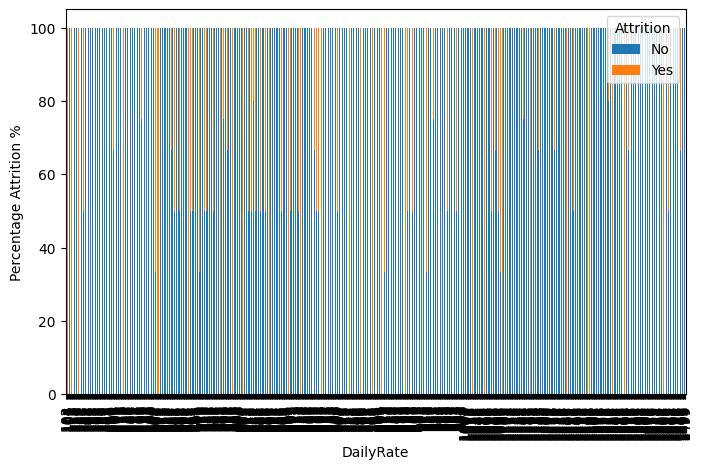

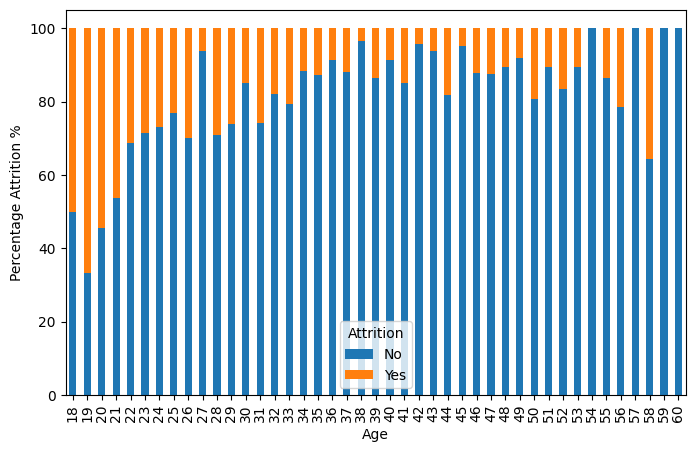

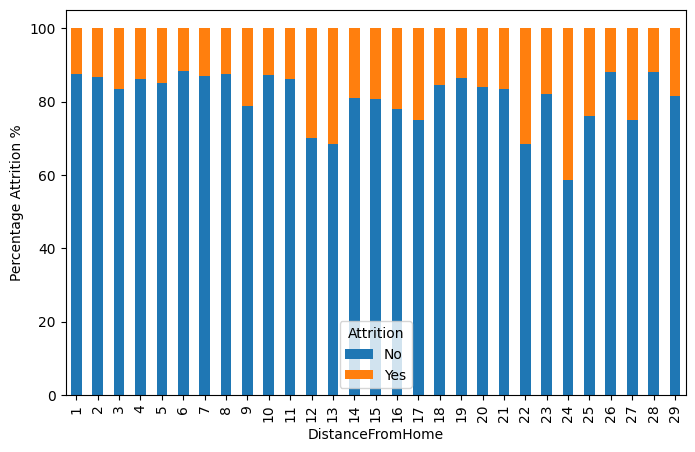

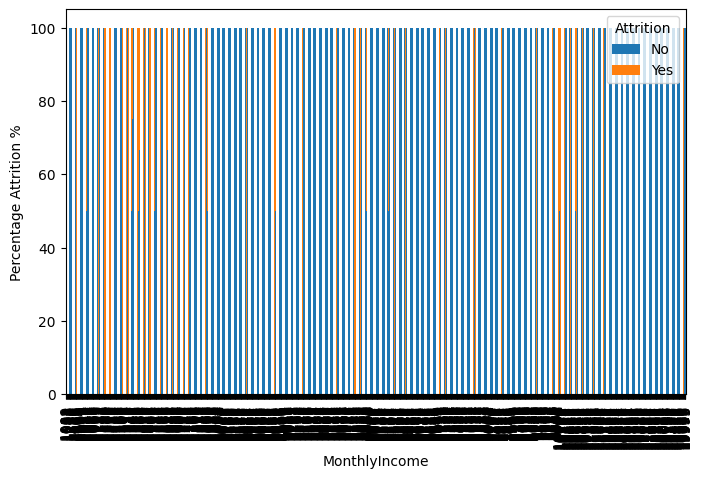

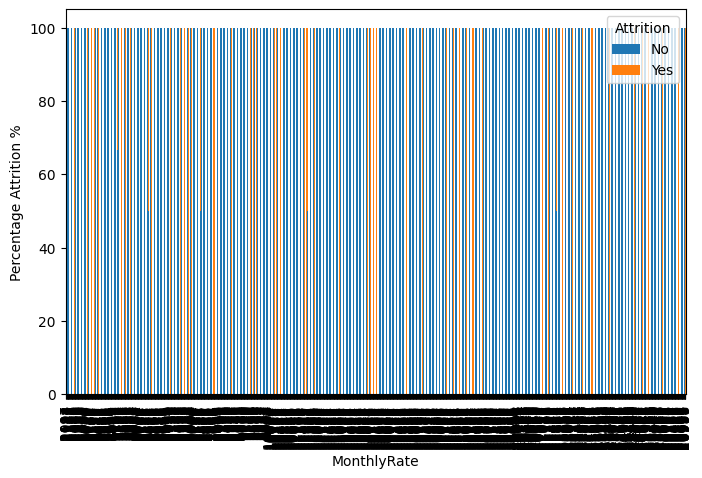

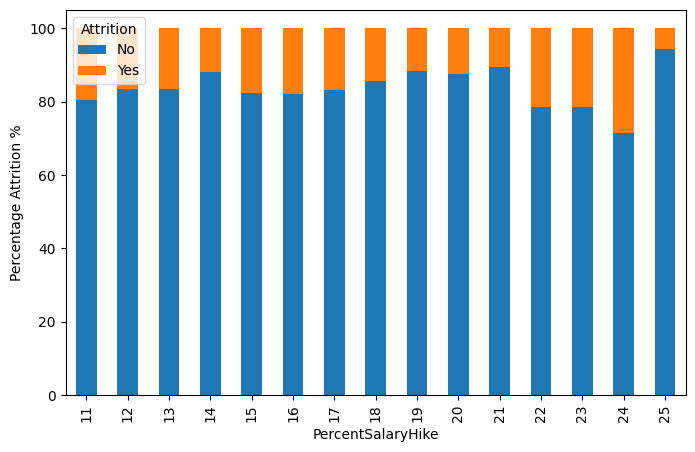

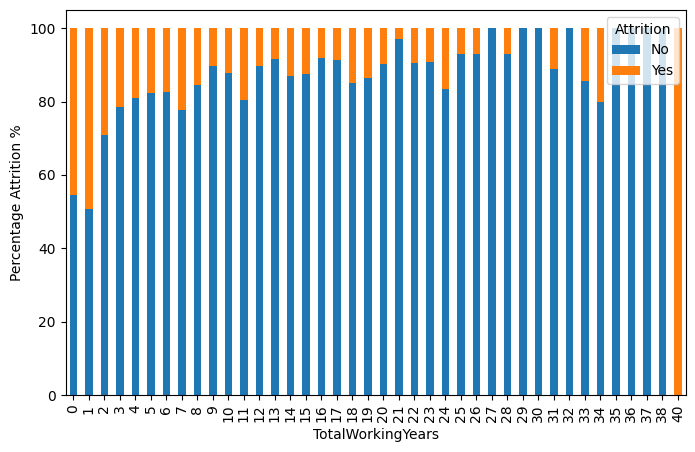

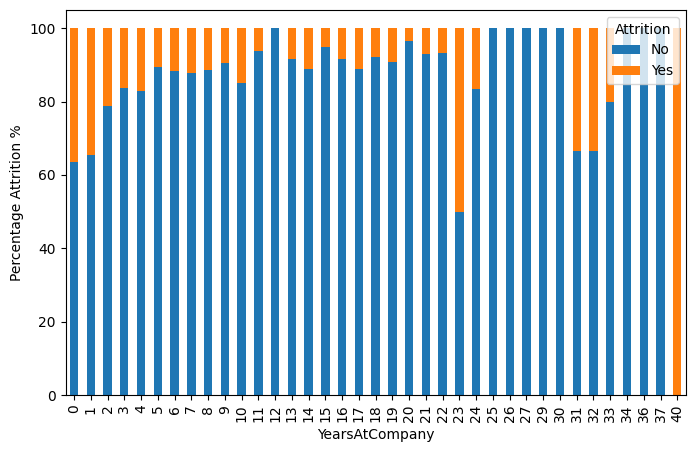

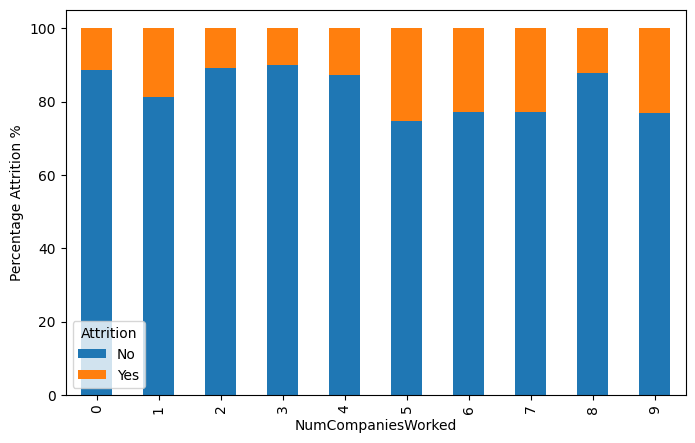

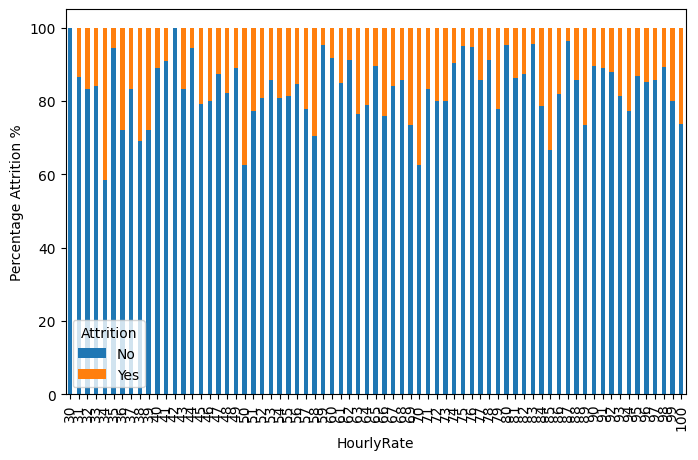

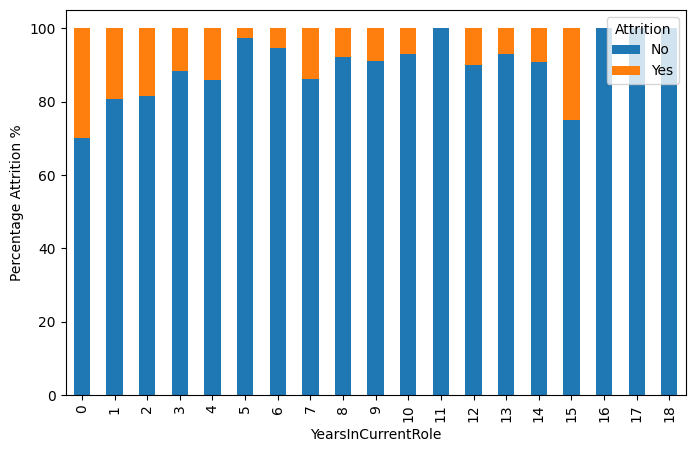

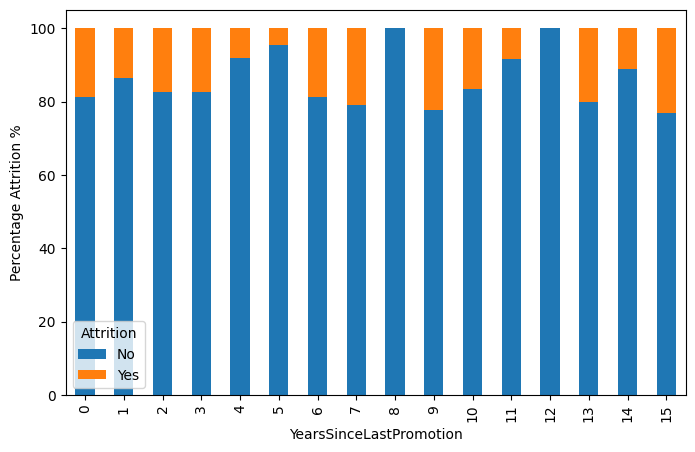

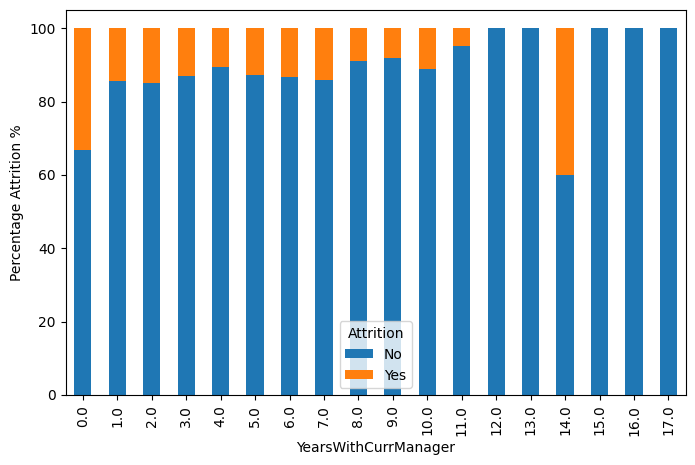

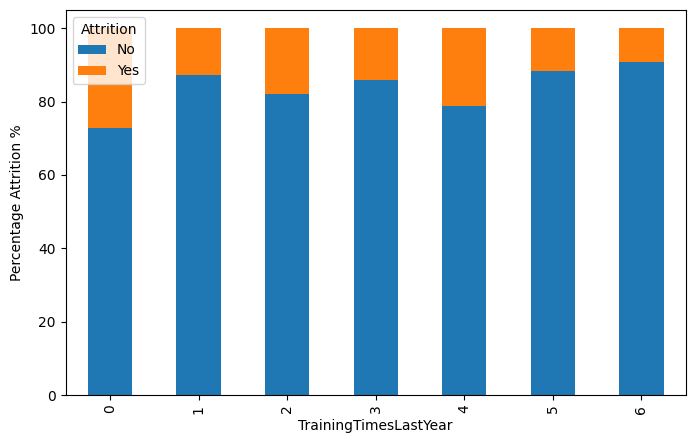

In [17]:
for col in numeric_cols:
    if col != "Attrition":
        # Creating a cross tab with normalized values (0 to 1) and getting the percentages, then plotting a barplot
        (pd.crosstab(df[col], df["Attrition"], normalize="index")*100).plot(kind="bar", figsize=(8,5), stacked=True)
        plt.ylabel("Percentage Attrition %")

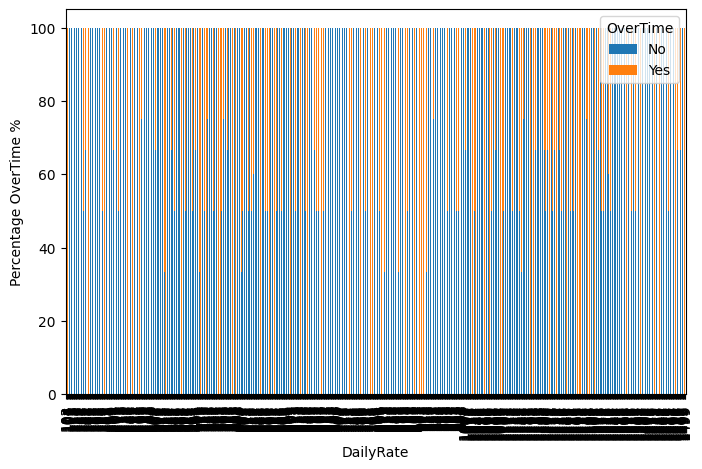

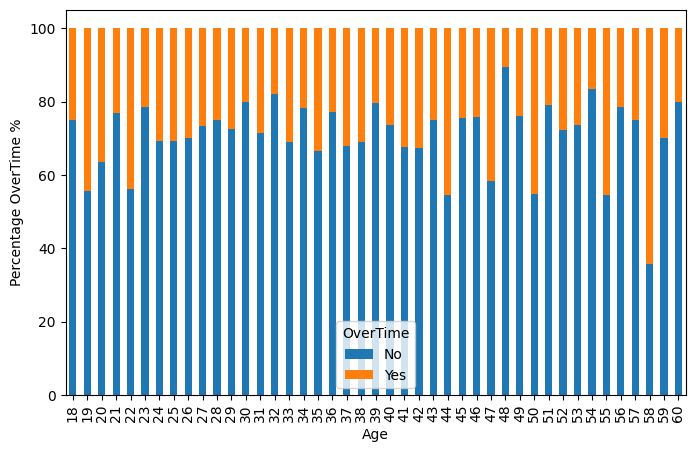

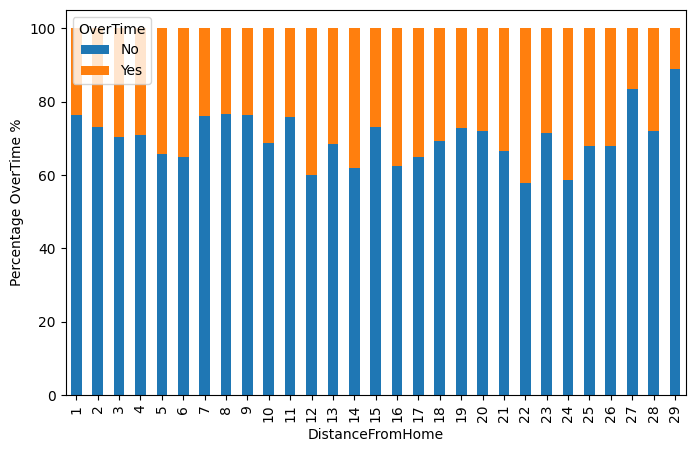

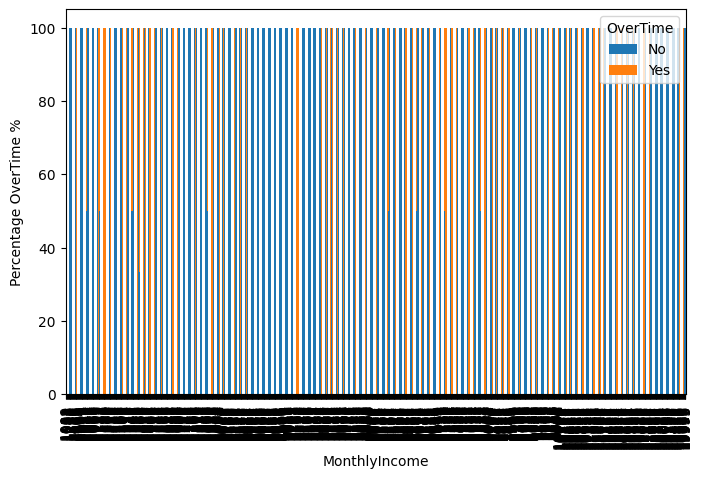

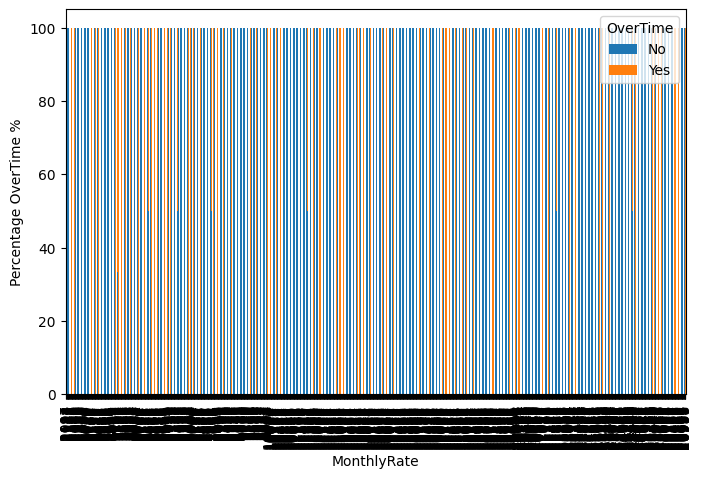

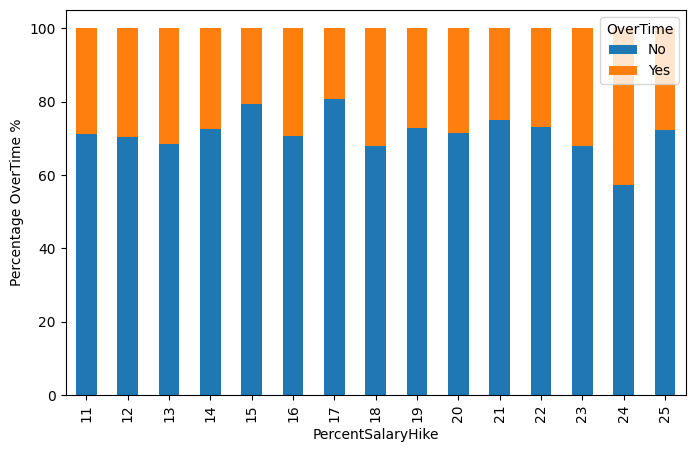

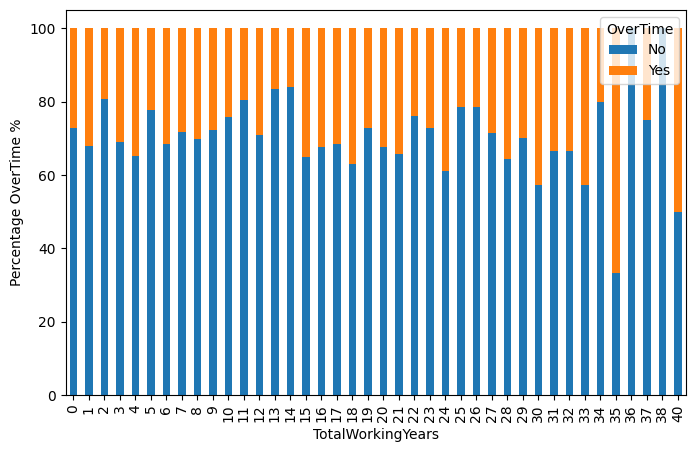

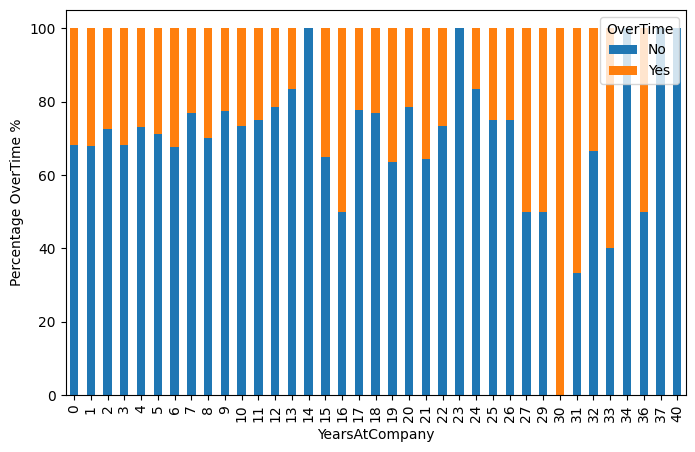

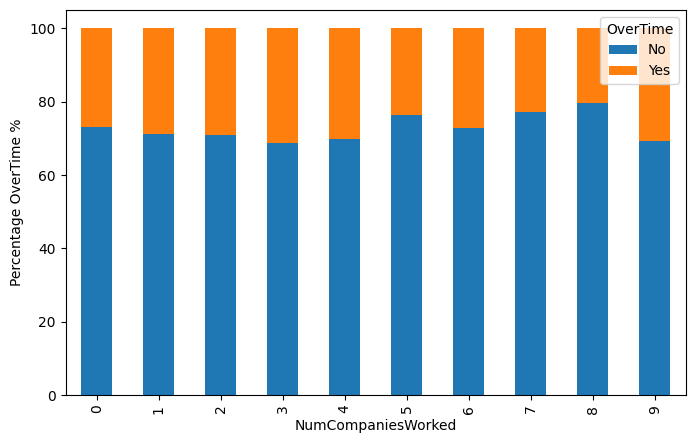

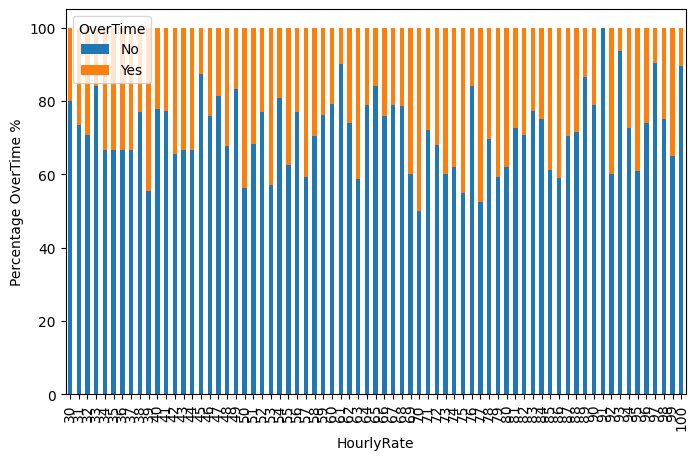

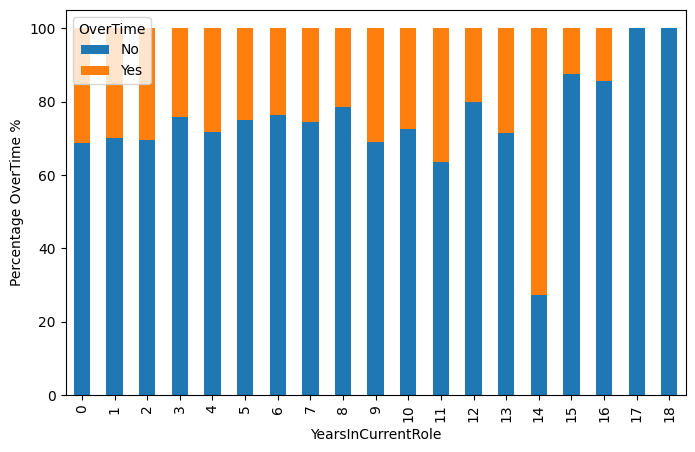

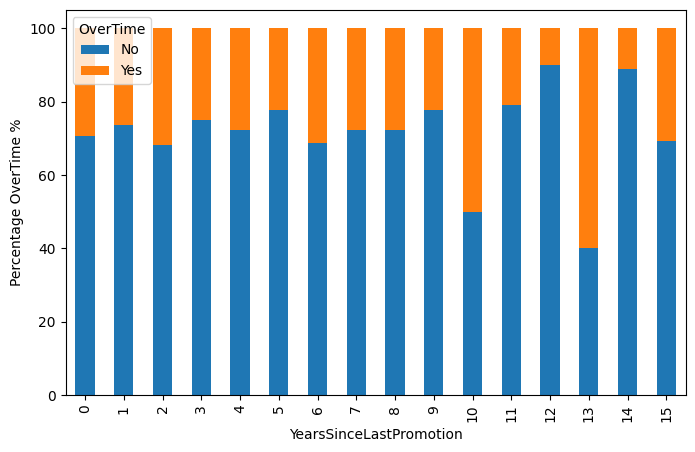

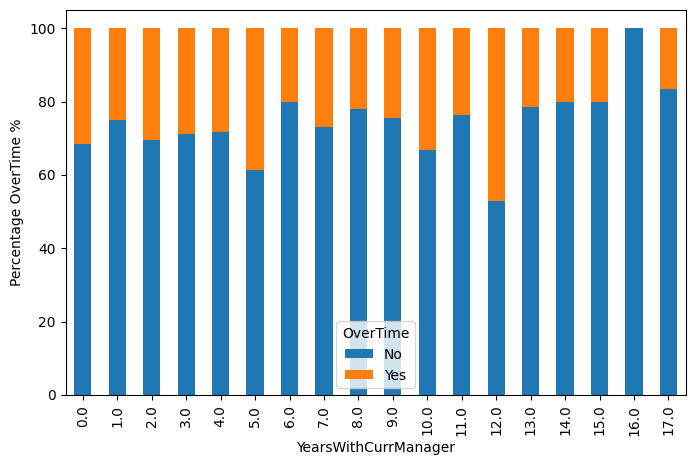

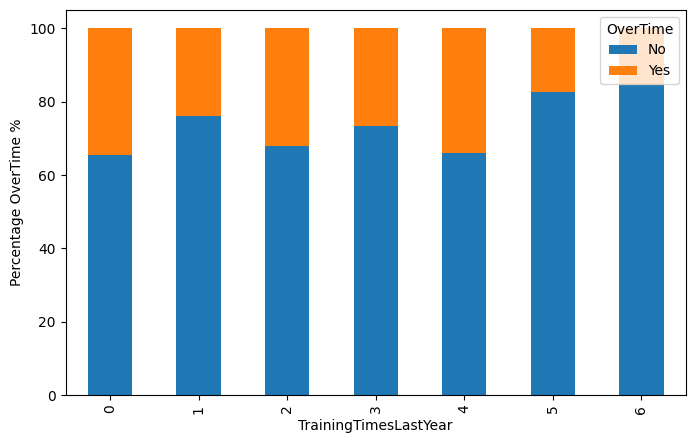

In [18]:
  for col in numeric_cols:
    if col != "OverTime":
        # Creating a cross tab with normalized values (0 to 1) and getting the percentages, then plotting a barplot
        (pd.crosstab(df[col], df["OverTime"], normalize="index")*100).plot(kind="bar", figsize=(8,5), stacked=True)
        plt.ylabel("Percentage OverTime %")

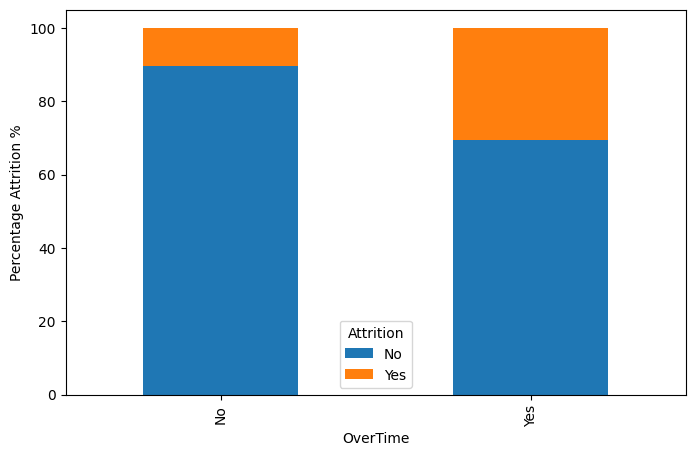

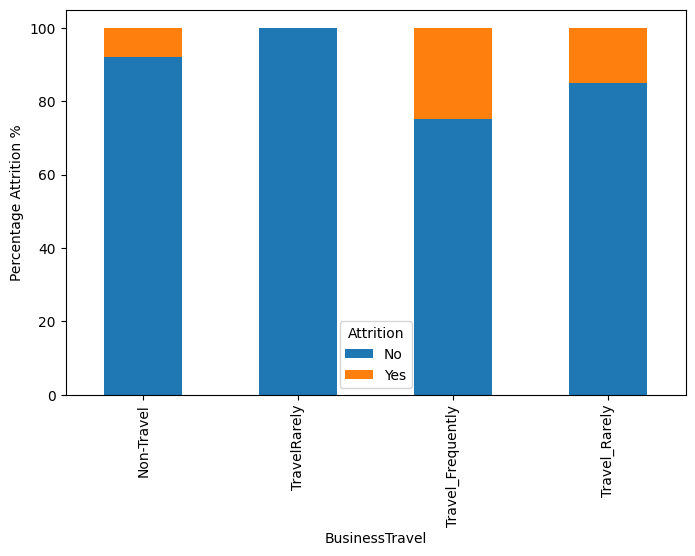

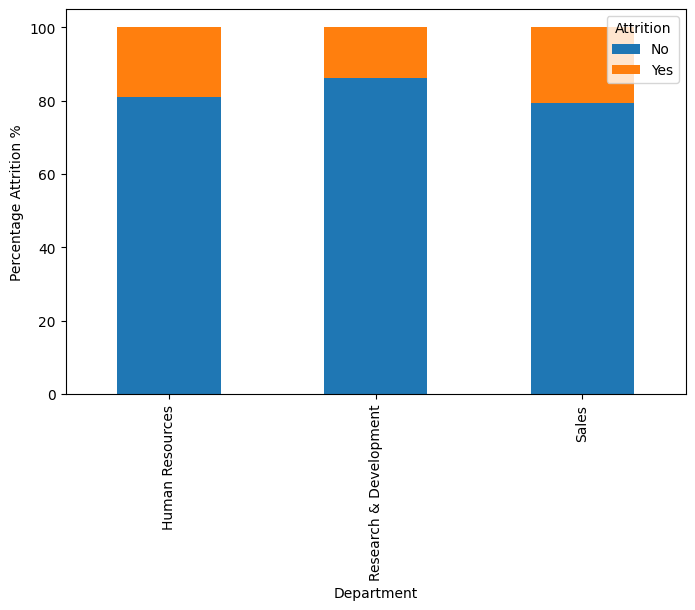

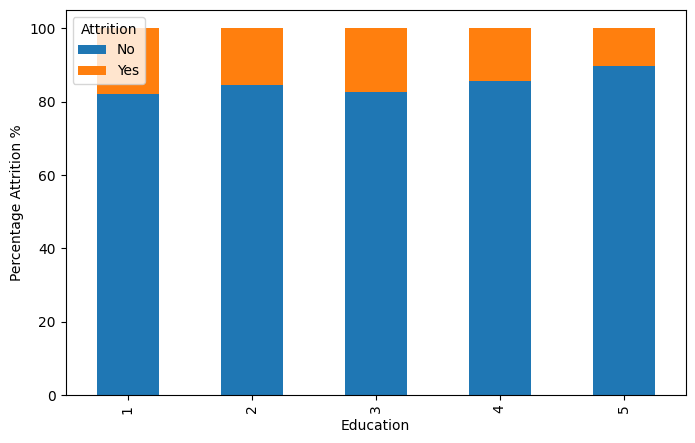

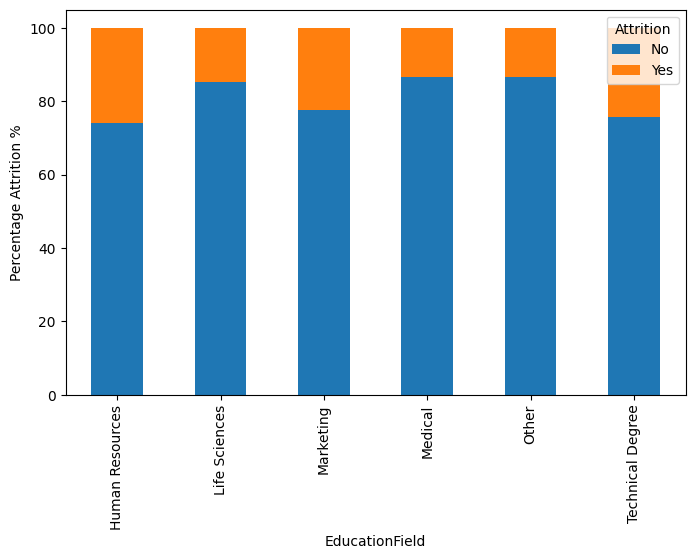

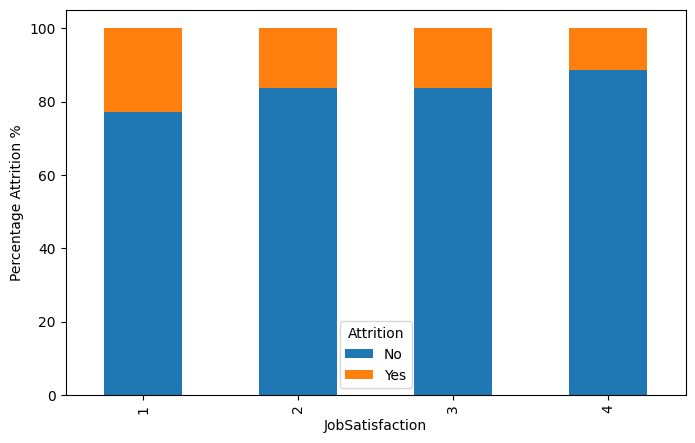

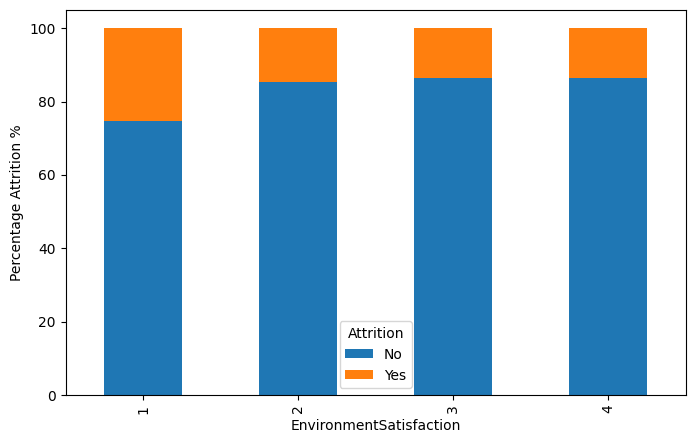

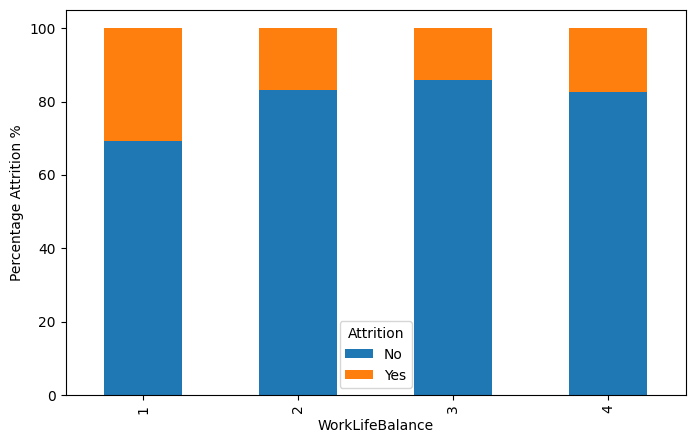

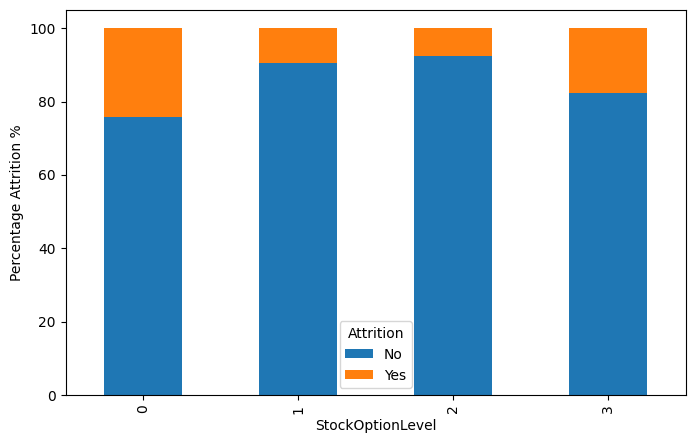

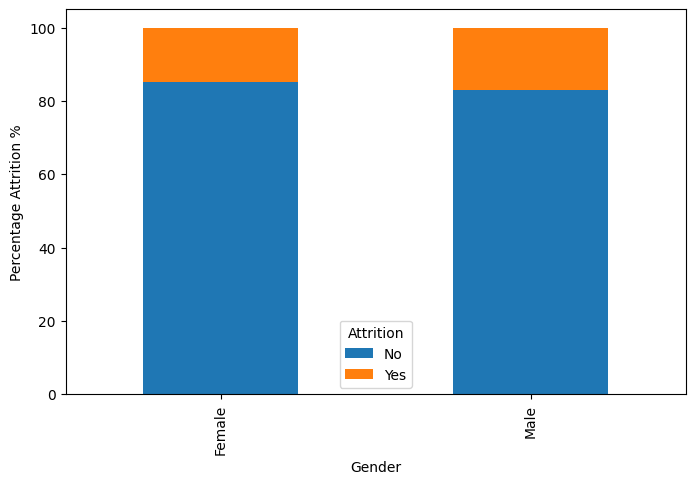

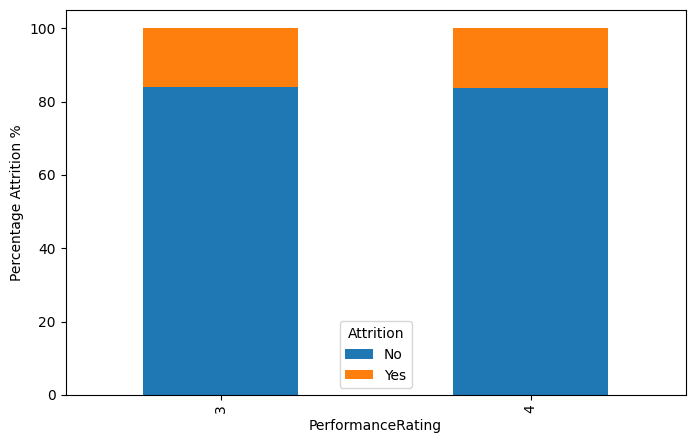

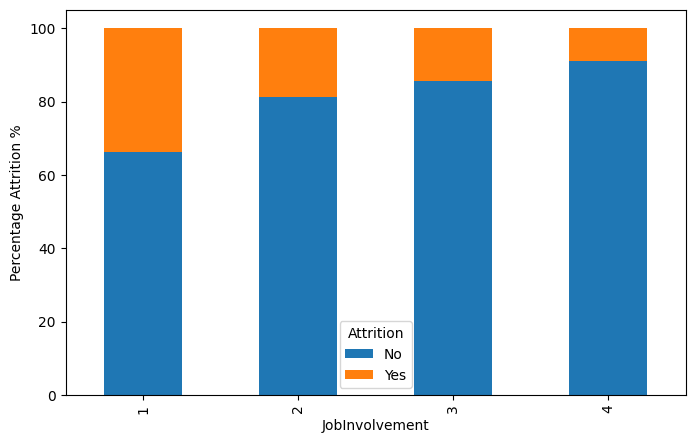

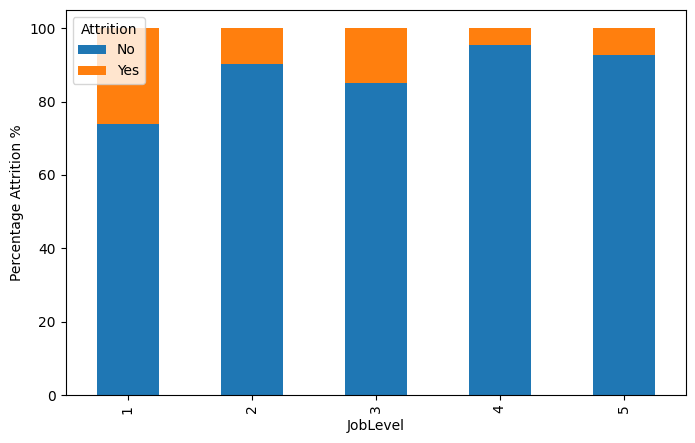

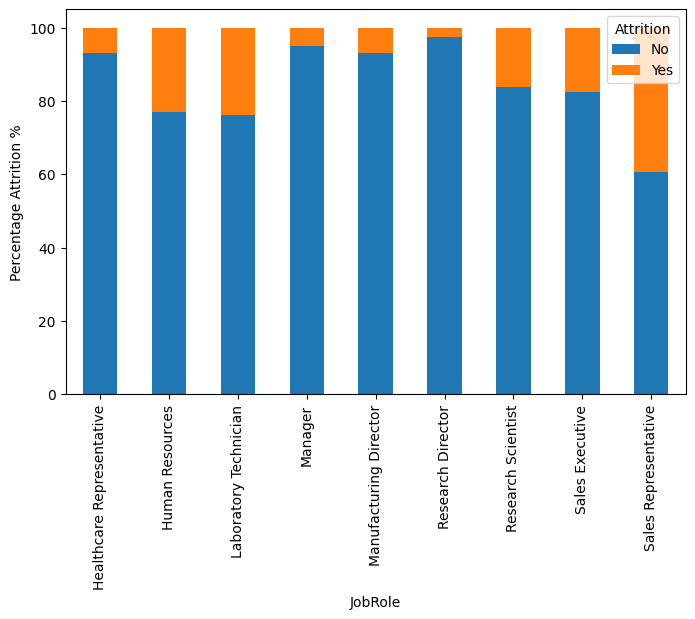

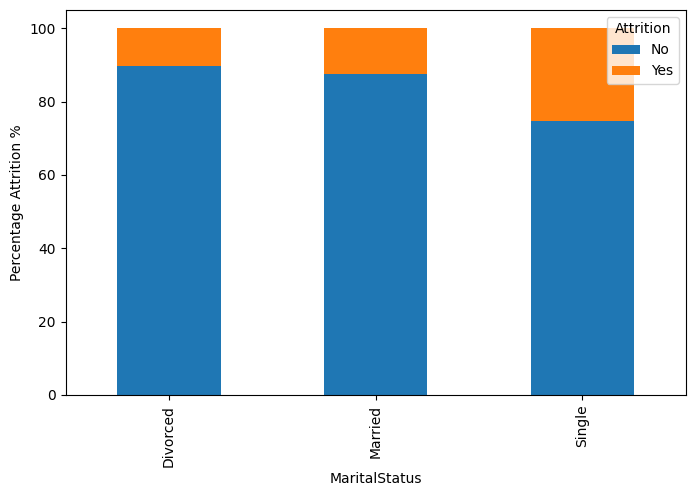

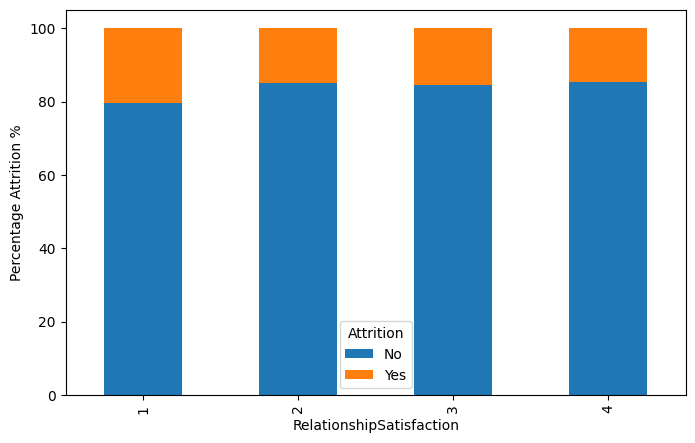

In [19]:
for col in categorical_cols:
    if col != "Attrition":
        # Creating a cross tab with normalized values (0 to 1) and getting the percentages, then plotting a barplot
        (pd.crosstab(df[col], df["Attrition"], normalize="index")*100).plot(kind="bar", figsize=(8,5), stacked=True)
        plt.ylabel("Percentage Attrition %")

## Observations:
* Attrition is more in employees who are working overtime, maybe these employees feel stressed in the work environment.
* Those who travel frequently have high attrition rate, these could be sales personnel. Those who travel rarely also have good amount of attrition, maybe these are scientists going to conferences. (just a hypothesis will need more domain knowledge from company on who are the one who travel rarely for business)
* All the departments have attriton but sales department has higher attrition followed by Human resource department. As from our previous observation we can bolster our assumption that sales guys who travel a lot are prone to attrition.
* Those with bachelors degree and those who have not done college have higher attrition. Maybe some of these people are going back to college to improve their skill level for better future and salary.
* Those from the field of Human resources and those who hold technical degree have high attrition followed by Marketing personnel.
* Those with lower job satisfaction, lower environment satisfaction, lower job involvement attrite more.
* People who do not have stock options are not much tied to the company and attrite more. However, there is attrition in those who have large stock options in the company, these could be older employees who are near the age of retirement.
* Male employee attrition is slightly more than female attriton, but these need to be subjectively viewed instead of taking at its face value.
* Those who are at lower job level attrite more followed by mid-senior job level.
Sales representatives have the highest rate of attrition followed by Human resources and Laboratory technicians.
* Performace Rating by the compay has no impact on the employee attrition or staying in the company. This area needs improvement.
* Looking at the personal info of the employees singles as we had concluded attrite more and those who declared their relationship status as poor attrite.

In [20]:
df["OverTime"] = df.OverTime.map({"Yes":1, "No":0})
df["Attrition"] = df.Attrition.map({"Yes":1, "No":0})


In [21]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

In [22]:
mapping = {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2, 'TravelRarely': 0}

# Replace categorical values with numerical values
df['BusinessTravel'] = df['BusinessTravel'].replace(mapping)

/var/folders/hn/9rk9tdps6pd65s9jcfjqcwjm0000gn/T/ipykernel_2731/1375230536.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BusinessTravel'] = df['BusinessTravel'].replace(mapping)


In [23]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AboveAverageSalary
0,RM297,18,18-25,1,0,230,Research & Development,3,3,Life Sciences,...,3,0,0,2,3,0,0,0,0.0,0
1,RM302,18,18-25,0,0,812,Sales,10,3,Medical,...,1,0,0,2,3,0,0,0,0.0,0
2,RM458,18,18-25,1,1,1306,Sales,5,3,Marketing,...,4,0,0,3,3,0,0,0,0.0,0
3,RM728,18,18-25,0,2,287,Research & Development,5,2,Life Sciences,...,4,0,0,2,3,0,0,0,0.0,0
4,RM829,18,18-25,1,2,247,Research & Development,8,1,Medical,...,4,0,0,0,3,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,0,0,422,Research & Development,7,3,Life Sciences,...,4,0,33,5,1,29,8,11,10.0,1
1476,RM428,60,55+,0,1,1499,Sales,28,3,Marketing,...,4,0,22,5,4,18,13,13,11.0,1
1477,RM537,60,55+,0,0,1179,Sales,16,4,Marketing,...,4,0,10,1,3,2,2,2,2.0,0
1478,RM880,60,55+,0,0,696,Sales,7,4,Marketing,...,2,1,12,3,3,11,7,1,9.0,0


In [24]:
numeric_cols = ['Attrition','BusinessTravel','OverTime','DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                      'YearsAtCompany','NumCompaniesWorked','HourlyRate',
                      'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']


<Axes: >

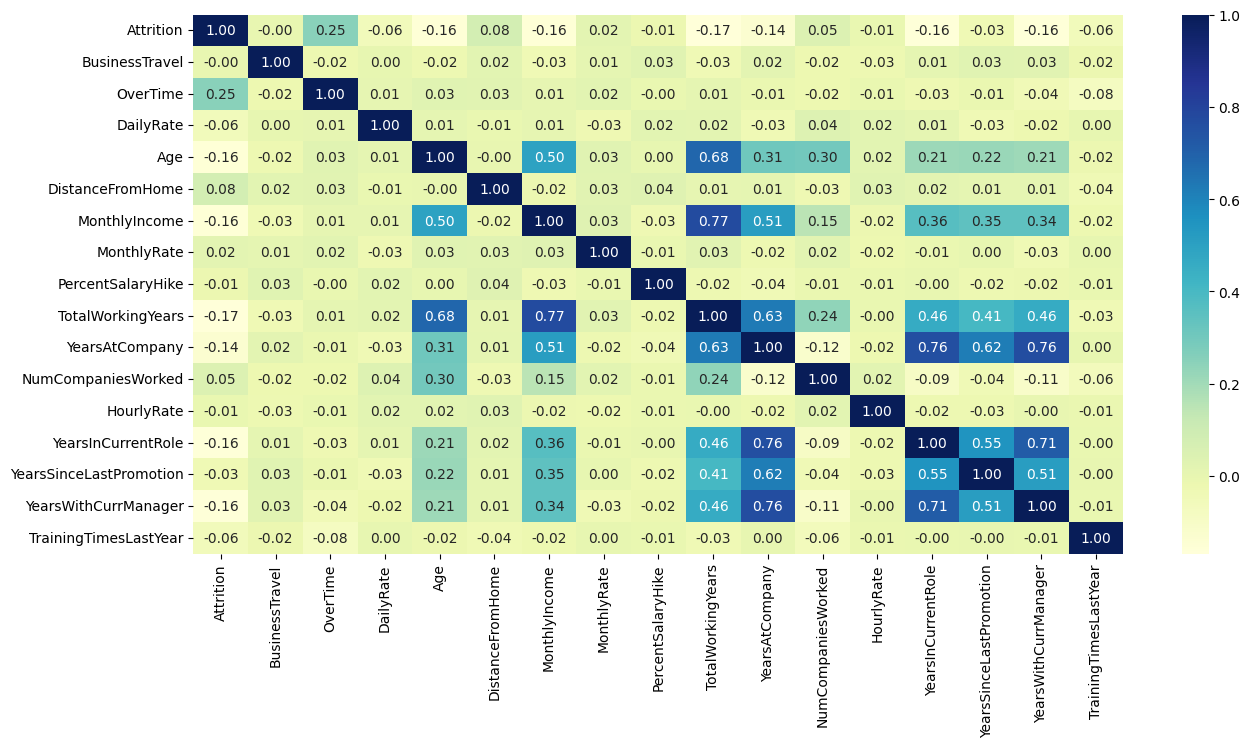

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt="0.2f", cmap="YlGnBu")

In [26]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AboveAverageSalary'],
      dtype='object')

In [107]:
# df = df[['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
#        'Department', 'DistanceFromHome', 'Education', 
#         'HourlyRate', 'JobInvolvement',
#        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
#        'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
#        'OverTime', 'PercentSalaryHike', 'PerformanceRating',
#        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
#        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
#        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
#        'AboveAverageSalary']]

# Causal Inference

In [54]:
from graphviz import Digraph
from IPython.display import display
# Define the columns in your dataset
columns = ["OverTime","Attrition", "Age", "Education","AboveAverageSalary", 'WorkLifeBalance', 'BusinessTravel','MaritalStatus', 'JobRole', 'StockOptionLevel','JobInvolvement']

# Define the edges between the variables based on domain knowledge
edges = edges = [
      ("WorkLifeBalance", 'Attrition'),
    ("WorkLifeBalance", 'OverTime'),
    ("Age", 'Attrition'),
    ("Age", 'Education'),
    ('OverTime', 'Attrition'),
     ('BusinessTravel', 'Attrition'),
      ('BusinessTravel', 'OverTime'),
     ("JobRole", "Attrition"),
    ("JobInvolvement", "Attrition"),
    ("JobRole","JobInvolvement" ),
      ('AboveAverageSalary', 'Attrition'),
     ("JobRole",'AboveAverageSalary'),
        ('MaritalStatus', "Attrition"),
   ("Education", "Attrition"),
    ("Education", 'AboveAverageSalary'),
    ("Education", "JobRole"),
     ("JobRole", "StockOptionLevel"),
     ("StockOptionLevel","Attrition")
    

    
    
    
    
    # Add more edges based on your domain knowledge
]


# Create a Digraph object
dot = Digraph()
# Add nodes to the graph
for col in columns:
    dot.node(col)

# Add edges to the graph
for edge in edges:
    dot.edge(edge[0], edge[1])


# 1. DAG

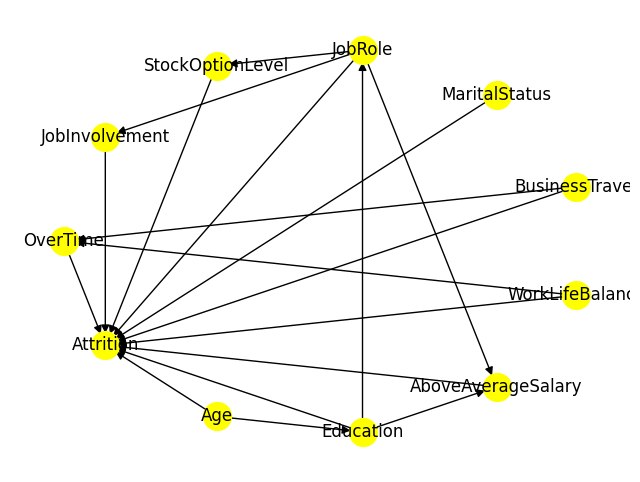

In [108]:
import pandas as pd
from dowhy import CausalModel
from sklearn.utils.validation import column_or_1d

# Assuming 'df' is your DataFrame and 'dot.source' is your graph
# Convert 'Attrition' column to a 1D array if it's not already
outcome = column_or_1d(df['Attrition'])
outcome_dict = {'Attrition': outcome}
# Create a causal model
model = CausalModel(
    data=df,
    treatment={'OverTime': column_or_1d(df['OverTime'])},    # Treatment: OverTime
    outcome=outcome_dict,   # Outcome: Attrition
    graph=dot.source  # Confounder: BusinessTravel,WorkLifeBalance
)

# Define the causal graph (DAG)
model.view_model()


# 2. Identification

In [106]:
estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                  
───────────(E[Attrition|BusinessTravel,WorkLifeBalance])
d[OverTime]                                             
Estimand assumption 1, Unconfoundedness: If U→{OverTime} and U→Attrition then P(Attrition|OverTime,BusinessTravel,WorkLifeBalance,U) = P(Attrition|OverTime,BusinessTravel,WorkLifeBalance)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# 3. Estimation

In [ ]:


# Print the estimated treatment effect
print("Estimated Treatment Effect (ATE):", estimate.value)

# Estimate the CTE for BusinessTravel
cte_estimate = model.estimate_effect(
    estimand,
    method_name="backdoor.propensity_score_matching",
    target_units="ate",
    method_params={"matches": 1}  # Use matching with 1:1 matches
   
)

# Print the estimated CTE for 'Age'
print("Estimated Conditional Treatment Effect (CTE) for BusinessTravel", cte_estimate.value)

The estimated treatment effect (ATE) of approximately 0.393 suggests that, on average, individuals who work overtime are around 0.393 times more likely to experience attrition compared to those who do not work overtime, after controlling for confounding variables such as business travel.

In [101]:
estimate.interpret()

Increasing the treatment variable(s) [OverTime] from 0 to 1 causes an increase of 0.39256756756756755 in the expected value of the outcome [Attrition], over the data distribution/population represented by the dataset.


# References


https://www.pywhy.org/dowhy/v0.9.1/example_notebooks/dowhy_simple_example.html#

https://pandas.pydata.org

https://graphviz.org/

https://seaborn.pydata.org/

https://www.w3schools.com/python/matplotlib_pyplot.asp
h
ttps://www.kaggle.com/datasets/HRAnalyticRepository/employee-attrition-data


## Abstract:

The provided links encompass various resources and tools essential for data analysis and visualization:

- **DoWhy Simple Example**: Demonstrates the usage of DoWhy, a Python library for causal inference, with a straightforward example.
- **Pandas Documentation**: Comprehensive documentation for Pandas, a powerful data manipulation and analysis library in Python.
- **Graphviz**: Graphviz documentation, offering tools for creating and visualizing graph structures, which can be particularly useful for causal graphs.
- **Seaborn**: Documentation for Seaborn, a Python visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.
- **Matplotlib Pyplot**: A tutorial from W3Schools focusing on Matplotlib's Pyplot module, which is widely used for creating static, animated, and interactive visualizations in Python.
- **Kaggle Dataset - Employee Attrition Data**: A Kaggle dataset containing information about employee attrition, offering valuable insights into factors contributing to employee turnover in various organizations.

## References:

- **DoWhy**: "DoWhy: An End-to-End Library for Causal Inference" by NeurIPS 2019 Proceedings
- **Pandas**: McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference.
- **Graphviz**: Ellson, J., Gansner, E., Koutsofios, L., North, S. C., & Woodhull, G. (2002). Graphv


MIT License

Copyright (c) 2024 Rutuja Kute

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.